In [1]:
# Initialise
%run ~/relmapping/annot/notebooks/__init__.ipynb

def vp(fp): return os.path.join('annot/S2_regulatory_annotation/metrics/', fp) # "verbose path"

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
# Load long cap jump & exon data
df_atac = pd.read_csv('annot/Fig1D1_accessible_sites/Fig1D1_accessible_sites.tsv' % locals(), sep='\t')
df_atac.head()

,chrom,start,end,atac_peak_accessibility,atac_source,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,atac_wt_ya_height,atac_glp1_d1_height,atac_glp1_d2_height,atac_glp1_d6_height,atac_glp1_d9_height,atac_glp1_d13_height
0,chrI,1900,2051,1975,atac_wt_se,1.487219,1.436852,1.234831,1.476625,1.180041,3.028015,0.984149,0.912876,1.155934,1.187989,1.661203
1,chrI,3826,3977,3901,atac_wt_pe,67.202148,58.451061,74.416000,133.738358,179.794342,211.372787,88.025909,69.674324,68.506355,64.593590,55.413097
2,chrI,4276,4427,4351,atac_wt_se,1.581892,2.656172,2.186598,3.502825,5.871352,7.771934,1.802739,1.327403,1.547550,2.069787,1.901336
3,chrI,11272,11423,11347,atac_wt_pe,2.606371,4.443353,9.830266,10.700469,11.683004,13.928377,20.864365,16.739265,17.585819,15.858321,17.019400
4,chrI,13070,13221,13145,atac_wt_pe,5.557951,3.608833,3.977978,3.398183,2.689872,2.953438,2.047788,2.084701,1.994170,2.586042,3.367910


In [3]:
#df_lcap = pd.read_csv('annot/S2_regulatory_annotation/_lcap_jump/lcap_summary.tsv' % locals(), sep='\t')
df_lcap_fwd = pd.read_csv('annot/S2_regulatory_annotation/metrics/lcap_all_fwd.tsv', sep='\t')
df_lcap_rev = pd.read_csv('annot/S2_regulatory_annotation/metrics/lcap_all_rev.tsv', sep='\t')
df_lcap = pd.concat([df_lcap_fwd, df_lcap_rev], axis=1)
df_lcap.head()

,lcap_wt_emb_fwd_ucount_rep1,lcap_wt_emb_fwd_ucount_rep2,lcap_wt_emb_fwd_dcount_rep1,lcap_wt_emb_fwd_dcount_rep2,lcap_wt_emb_fwd_ucount_sum,lcap_wt_emb_fwd_dcount_sum,lcap_wt_emb_fwd_baseMean,lcap_wt_emb_fwd_log2FoldChange,lcap_wt_emb_fwd_lfcSE,lcap_wt_emb_fwd_stat,...,lcap_glp1_d13_rev_ucount_sum,lcap_glp1_d13_rev_dcount_sum,lcap_glp1_d13_rev_baseMean,lcap_glp1_d13_rev_log2FoldChange,lcap_glp1_d13_rev_lfcSE,lcap_glp1_d13_rev_stat,lcap_glp1_d13_rev_pvalue,lcap_glp1_d13_rev_padj,lcap_glp1_d13_rev_passed,lcap_glp1_d13_rev_summary
0,0,0,66,83,0,149,34.824190,7.848748,1.658774,4.731656,...,1050,1005,516.0592,-0.281726,0.096771,0.000000,9.982002e-01,1.000000e+00,False,False / -0.28 / 1
1,4,3,0,0,7,0,1.870596,-4.271325,2.059588,0.000000,...,225,1467471,340139.9000,12.447420,0.096019,129.634600,0.000000e+00,0.000000e+00,True,True / 12.45 / 0
2,0,0,0,0,0,0,0.000000,NaN,NaN,NaN,...,6386,4929,2864.3730,-0.592226,0.042317,0.000000,1.000000e+00,1.000000e+00,False,False / -0.59 / 1
3,295,276,1164,1074,571,2238,675.706900,1.776334,0.102397,17.347510,...,0,575,133.2532,9.651586,1.608163,6.001621,9.767876e-10,2.474987e-09,True,True / 9.65 / 2.47e-09
4,2004,1945,1727,1789,3949,3516,1877.233000,-0.360947,0.055910,0.000000,...,412,454,216.3161,-0.078527,0.143140,0.000000,7.083610e-01,1.000000e+00,False,False / -0.08 / 1


In [4]:
# (Setup stranded structs)
df_prom_fwd = df_atac[['chrom', 'start', 'end']].copy()
df_prom_rev = df_atac[['chrom', 'start', 'end']].copy()
df_prom_fwd['strand'] = '+'
df_prom_rev['strand'] = '-'

In [5]:
# df_exon1 / df_exon2: first/other exons, coordinates fixed to represent 5' ends
#NAMES_EXON = ('chrom', 'start', 'end', 'transcript_id', 'score', 'strand', 'gene_id', 'gene_biotype', 'display_id')
l_adj_ = [
    'chrom', 'start', 'end', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'Name', 
    'exon_start', 'exon_end', 'utr_start', 'utr_end', 'aoe_end', 'aoe_start', 'gene_biotype', 
    'exon_id', 'gene_id', 'locus_id', 'init_cutoff_pos', 
]

#df_pass1_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_fwd.bed')
#df_pass1_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_rev.bed')
df_pass1_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_fwd_utradj.bed')[l_adj_]
df_pass1_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon1_rev_utradj.bed')[l_adj_]
df_pass1_exon2_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon2_fwd.bed')
df_pass1_exon2_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass1_exon2_rev.bed')
df_pass2_exon1_fwd = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass2_exon1_fwd.bed')
df_pass2_exon1_rev = read_gffbed('WS260_ce10/WS260_ce10.transcripts.annot_pass2_exon1_rev.bed')

print(len(df_pass1_exon1_fwd), len(df_pass1_exon1_rev),
      len(df_pass1_exon2_fwd), len(df_pass1_exon2_rev),
      len(df_pass2_exon1_fwd), len(df_pass2_exon1_rev),
)

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


17922 17074 105494 99143 808 753


In [6]:
# Match hypersensitive sites to closest first/other exon
def df_closest(df_a, df_b, b_prefix, **kwargs):
    df_a_sort = df_a
    df_b_sort = df_b.sort_values(list(df_b.columns[:3]))
    fn_ = BedTool.from_dataframe(df_a).closest(BedTool.from_dataframe(df_b_sort).fn, **kwargs).fn
    names_ = list(itertools.chain(df_a.columns.values,
        ['%s_%s' % (b_prefix, col) for col in df_b.columns.values],
        ['%s_distance' % (b_prefix)]
    ))
    df_ = pd.read_csv(fn_, names=names_, sep='\t')
    return df_[names_[len(df_a.columns):]]

l_atac_peak_pos = df_atac[['start', 'end']].mean(axis=1).map(int)

# Closest exon1 -- protein_coding & pseudogene
df_ = pd.concat([df_atac['chrom'], l_atac_peak_pos, l_atac_peak_pos + 1], axis=1).copy()
df_pass1_exon1_fwd_out_ = df_closest(df_, df_pass1_exon1_fwd, 'pass1_exon1', D='ref', t='first', iu=True)
df_pass1_exon1_rev_out_ = df_closest(df_, df_pass1_exon1_rev, 'pass1_exon1', D='ref', t='last', id=True)

# Closest exon2 can be both upstream or downstream
df_pass1_exon2_fwd_out_ = df_closest(df_, df_pass1_exon2_fwd, 'pass1_exon2', D='ref', t='first')
df_pass1_exon2_rev_out_ = df_closest(df_, df_pass1_exon2_rev, 'pass1_exon2', D='ref', t='last') 

# Closes pass2/exon1 -- tRNA, snoRNA, rRNA, miRNA, etc
df_pass2_exon1_fwd_out_ = df_closest(df_, df_pass2_exon1_fwd, 'pass2_exon1', D='ref', t='first', iu=True)
df_pass2_exon1_rev_out_ = df_closest(df_, df_pass2_exon1_rev, 'pass2_exon1', D='ref', t='last', id=True)

df_exon_fwd = pd.concat([df_pass1_exon1_fwd_out_, df_pass1_exon2_fwd_out_, df_pass2_exon1_fwd_out_], axis=1)
df_exon_rev = pd.concat([df_pass1_exon1_rev_out_, df_pass1_exon2_rev_out_, df_pass2_exon1_rev_out_], axis=1)

df_exon_fwd.to_csv(vp('closest_exon_fwd.tsv'), header=True, index=False, sep='\t')
df_exon_rev.to_csv(vp('closest_exon_rev.tsv'), header=True, index=False, sep='\t')

l_ = ['pass1_exon1_gene_id', 'pass1_exon1_locus_id', 'pass1_exon1_distance']
write_gffbed(vp('closest_pass1_exon1_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass1_exon1_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)

write_gffbed(vp('closest_pass1_exon1_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass1_exon1_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

l_ = ['pass1_exon2_gene_id', 'pass1_exon2_locus_id', 'pass1_exon2_distance']
write_gffbed(vp('closest_pass1_exon2_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass1_exon2_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)

write_gffbed(vp('closest_pass1_exon2_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass1_exon2_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

l_ = ['pass2_exon1_gene_id', 'pass2_exon1_locus_id', 'pass2_exon1_distance']
write_gffbed(vp('closest_pass2_exon1_fwd.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['pass2_exon1_Name'],
    strand = '+',
    attr = df_exon_fwd[l_], 
)

write_gffbed(vp('closest_pass2_exon1_rev.bed'),
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['pass2_exon1_Name'],
    strand = '-',
    attr = df_exon_rev[l_], 
)

In [7]:
# maximum gap between hypersensitive site and downstream first exons
def maxgap(a): return max(len(list(g)) if (k == 0) or (k != k) else 0 for k,g in itertools.groupby(a))

def nanmaxgap(a): return maxgap([e if e == e else 0 for e in a])

def maxgap_fwd_(fp_inp, chroms, atac_modes, exon1_starts, flank_len=250):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_start) in itertools.islice(zip(chroms, atac_modes, exon1_starts), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(atac_mode + flank_len, 0)
        end_ = min(exon1_start + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

def maxgap_rev_(fp_inp, chroms, atac_modes, exon1_ends, flank_len=250):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_end) in itertools.islice(zip(chroms, atac_modes, exon1_ends), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(exon1_end - 1, 0)
        end_ = min(atac_mode - flank_len + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

def maxgap_fwd(stage):
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.filled_fwd.mean_by_stage'
    fp_fwd = pf('lcap808_%s' % (stage,), step, '.bw', 'lcap808')
    l_maxgap = maxgap_fwd_(fp_fwd, df_atac['chrom'], l_atac_peak_pos, df_exon_fwd['pass1_exon1_start'])
    return pd.DataFrame({'maxgap_%s_fwd' % (stage,): l_maxgap})

def maxgap_rev(stage):
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.filled_rev.mean_by_stage'
    fp_rev = pf('lcap808_%s' % (stage,), step, '.bw', 'lcap808')
    l_maxgap = maxgap_rev_(fp_rev, df_atac['chrom'], l_atac_peak_pos, df_exon_rev['pass1_exon1_end'])
    return pd.DataFrame({'maxgap_%s_rev' % (stage,): l_maxgap})

df_maxgap_fwd = pd.concat(pmap(maxgap_fwd, config['stages'], n_jobs=15), axis=1)
df_maxgap_rev = pd.concat(pmap(maxgap_rev, config['stages'], n_jobs=15), axis=1)

# Visualise maxgap as .bed-files
def itemRgb_(maxgap_):
    if maxgap_ == 0:
        return RED
    else:
        return BLUE

write_gffbed('annot/S2_regulatory_annotation/metrics/maxgap_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap_fwd.min(axis=1),
    strand = '+',
    attr = df_maxgap_fwd,
    itemRgb = map(itemRgb_, df_maxgap_fwd.min(axis=1)),
)

write_gffbed('annot/S2_regulatory_annotation/metrics/maxgap_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap_rev.min(axis=1),
    strand = '-',
    attr = df_maxgap_rev,
    itemRgb = map(itemRgb_, df_maxgap_rev.min(axis=1)),
)

!wc -l annot/S2_regulatory_annotation/maxgap_rev.bed
!wc -l annot/S2_regulatory_annotation/maxgap_fwd.bed

[Parallel(n_jobs=15)]: Done  11 out of  11 | elapsed:  1.3min finished
[Parallel(n_jobs=15)]: Done  11 out of  11 | elapsed:  1.4min finished


42246 annot/S2_regulatory_annotation/maxgap_rev.bed
42246 annot/S2_regulatory_annotation/maxgap_fwd.bed


In [8]:
# scap_count <- <scap tags within region>; scap_mode_raw <- <scap mode position>; scap_mode_count <- <tags at mode>
#fp_fwd = pf('scap541_emb_l3_ya', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.rm_non_coding.firstbp_fwd.rm_exonic', '.bw', 'scap')
#fp_rev = pf('scap541_emb_l3_ya', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.rm_non_coding.firstbp_rev.rm_exonic', '.bw', 'scap')
fp_fwd = pf('scap815_wt_all', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.firstbp_fwd.gt0x2', '.bw', 'scap815')
fp_rev = pf('scap815_wt_all', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.firstbp_rev.gt0x2', '.bw', 'scap815')

flank_len = 125
chroms_ = list(df_atac['chrom'])
starts_ = list(l_atac_peak_pos - flank_len)
ends_ =  list(l_atac_peak_pos + flank_len)

df_prom_fwd['scap_count'] = list(map(lambda c: int(np.nansum(c)), yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_count'] = list(map(lambda c: int(np.nansum(c)), yp.read_regions(fp_rev, chroms_, starts_, ends_)))

def mode_raw_(s, c):
    return int(s + yp.nanargmax_median(c))
df_prom_fwd['scap_mode_raw'] = list(map(mode_raw_, starts_, yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_mode_raw'] = list(map(mode_raw_, starts_, yp.read_regions(fp_rev, chroms_, starts_, ends_)))

df_prom_fwd['scap_mode_count'] = list(map(yp.nanmax, yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_mode_count'] = list(map(yp.nanmax, yp.read_regions(fp_rev, chroms_, starts_, ends_)))

n = float(len(df_atac))
n_scap_fwd = len(df_prom_fwd.query('scap_mode_count >= 2'))
n_scap_rev = len(df_prom_rev.query('scap_mode_count >= 2'))
n_scap_bid = sum((df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2))
n_scap_either = sum((df_prom_fwd['scap_mode_count'] >= 2) | (df_prom_rev['scap_mode_count'] >= 2))
print(n_scap_fwd, n_scap_rev, n_scap_bid, n_scap_either, 'fwd/rev/both/either in pooled scap')
print(n_scap_fwd / n, n_scap_rev / n, n_scap_bid / n, n_scap_either / n)
m = (df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2)
print(np.median(df_prom_fwd[m]['scap_mode_raw'] - df_prom_rev[m]['scap_mode_raw']), 'median mode >= 2 tags')
m = (df_prom_fwd['scap_mode_count'] >= 10) & (df_prom_rev['scap_mode_count'] >= 10)
print(np.median(df_prom_fwd[m]['scap_mode_raw'] - df_prom_rev[m]['scap_mode_raw']), 'median mode (>= 10 tags)')

28948 28868 23059 34757 fwd/rev/both/either in pooled scap
0.6852408569061428 0.6833471416735708 0.545839744348 0.822748254231
104.0 median mode >= 2 tags
113.0 median mode (>= 10 tags)


In [9]:
# "Extrapolate" likely regions of txn initiation based on peak accessibility
# On average, short cap modes are spaced by 120bp
# Extrapolate short cap modes by peak accessibility +/- 60 (120bp/2) if no short cap mode was found
# (These "extrapolated" short cap modes can be discarded by filtering for scap_mode_count > 0)
def scap_mode_fwd_(scap_mode_raw, scap_mode_count, atac_mode):
    if scap_mode_count > 0:
        return scap_mode_raw
    else:
        return atac_mode + 60

def scap_mode_rev_(scap_mode_raw, scap_mode_count, atac_mode):
    if scap_mode_count > 0:
        return scap_mode_raw
    else:
        return atac_mode - 60

df_prom_fwd['scap_mode'] = list(map(scap_mode_fwd_, df_prom_fwd['scap_mode_raw'], df_prom_fwd['scap_mode_count'], l_atac_peak_pos))
df_prom_rev['scap_mode'] = list(map(scap_mode_rev_, df_prom_rev['scap_mode_raw'], df_prom_rev['scap_mode_count'], l_atac_peak_pos))
print('%d / %d sites with extrapolated txn initiation' % (
    len(df_prom_fwd.query('scap_mode_count == 0')), 
    len(df_prom_rev.query('scap_mode_count == 0'))
))

13297 / 13377 sites with extrapolated txn initiation


In [10]:
# Stage-specific annotation
d_annot_strand_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('transcription_initiation', yp.GREEN),
    ('no_transcription', yp.BLUE),
])

d_annot_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('putative_enhancer', yp.GREEN),
    ('other_element', yp.BLUE),
])

def prom_summary_stage(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):
    for (chrom, start, end, jump, incr, maxgap, exon1_dist, exon2_dist, pass2_exon1_dist, scap_mode_count, scap_diff, gene_biotype) in \
            zip(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):

        near_exon1 = abs(exon1_dist) < 250
        near_exon2 = abs(exon2_dist) < 250
        near_pass2_exon1 = abs(pass2_exon1_dist) < 250
        has_scap = scap_mode_count >= 2
        
        #is_gene_biotype = (gene_biotype == 'protein_coding') | (gene_biotype == 'pseudogene')
        v = False
        #if chrom == "chrI" and start == 183421 and end == 183568: v = True

        # "General case" -- hypersensitive site is away from all exons
        if near_exon1 or not(near_exon2):
            if jump and (maxgap <= 0) and (scap_diff >= 0) and has_scap:
                #if v: print('coding_promoter0')
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
            # "Special cases" -- elongation increase could be due to a nearby exon
            # exception #1: closest annotation is non-coding
            elif near_pass2_exon1:
                if v: print('non-coding_RNA')
                yield 'non-coding_RNA'
            elif jump and has_scap:
                if v: print('unknown_promoter0')
                yield 'unknown_promoter'
            elif has_scap:
                if v: print('transcription_initiation0')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription0')
                yield 'no_transcription'

        # Site has to overlap non-first exon
        else:
            assert(near_exon2)
            if near_pass2_exon1:
                if v: print('non-coding_RNA')
                yield 'non-coding_RNA'
            elif has_scap:
                if v: print('no_transcription3')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription3')
                yield 'no_transcription'

for stage in itertools.islice(config['stages'], None):
    print(stage, 'fwd')
    df_prom_fwd['annot_%s' % (stage,)] = list(prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_%s_fwd_passed' % (stage,)],
        df_lcap['lcap_%s_fwd_passed' % (stage,)],
        df_maxgap_fwd['maxgap_%s_fwd' % (stage,)],
        df_exon_fwd['pass1_exon1_start'] - l_atac_peak_pos,
        df_exon_fwd['pass1_exon2_start'] - l_atac_peak_pos,
        df_exon_fwd['pass2_exon1_start'] - l_atac_peak_pos,
        df_prom_fwd['scap_mode_count'],
        pd.to_numeric(df_exon_fwd['pass1_exon1_init_cutoff_pos'], errors='coerce') - df_prom_fwd['scap_mode'],
        df_exon_fwd['pass1_exon1_gene_biotype'],
    ))
    print(stage, 'rev')
    df_prom_rev['annot_%s' % (stage,)] = list(prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_%s_rev_passed' % (stage,)],
        df_lcap['lcap_%s_rev_passed' % (stage,)],
        df_maxgap_rev['maxgap_%s_rev' % (stage,)],
        l_atac_peak_pos - (df_exon_rev['pass1_exon1_end'] - 1),
        l_atac_peak_pos - (df_exon_rev['pass1_exon2_end'] - 1),
        l_atac_peak_pos - (df_exon_rev['pass2_exon1_end'] - 1),
        df_prom_rev['scap_mode_count'],
        df_prom_rev['scap_mode'] - pd.to_numeric(df_exon_rev['pass1_exon1_init_cutoff_pos'], errors='coerce'),
        df_exon_rev['pass1_exon1_gene_biotype'],
    ))

wt_emb fwd
wt_emb rev
wt_l1 fwd
wt_l1 rev
wt_l2 fwd
wt_l2 rev
wt_l3 fwd
wt_l3 rev
wt_l4 fwd
wt_l4 rev
wt_ya fwd
wt_ya rev
glp1_d1 fwd
glp1_d1 rev
glp1_d2 fwd
glp1_d2 rev
glp1_d6 fwd
glp1_d6 rev
glp1_d9 fwd
glp1_d9 rev
glp1_d13 fwd
glp1_d13 rev


In [11]:
# Aggregate stage-specific annotations across stages
def annot_summary(l_annot):
    l_ranking = list(d_annot_strand_legend.keys())
    l_annot_i = [l_ranking.index(annot) for annot in l_annot]
    return l_ranking[min(l_annot_i)]

df_prom_fwd['annot_summary'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_prom_fwd[['annot_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

df_prom_rev['annot_summary'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_prom_rev[['annot_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

In [12]:
# Additional low-confidence promoter annotation
def lowconf_prom_summary_stage(l_chrom, l_start, l_end, l_jump, l_incr, l_log2FoldChange, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):
    for (chrom, start, end, jump, incr, log2FoldChange, maxgap, exon1_dist, exon2_dist, pass2_exon1_dist, scap_mode_count, scap_diff, gene_biotype) in \
            zip(l_chrom, l_start, l_end, l_jump, l_incr, l_log2FoldChange, l_maxgap, l_exon1_dist, l_exon2_dist, l_pass2_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):

        near_exon1 = abs(exon1_dist) < 250
        near_exon2 = abs(exon2_dist) < 250
        near_pass2_exon1 = abs(pass2_exon1_dist) < 250
        has_scap = scap_mode_count >= 2
        
        #is_gene_biotype = (gene_biotype == 'protein_coding') | (gene_biotype == 'pseudogene')
        v = False
        #if chrom == "chrI" and start == 183421 and end == 183568: v = True
        if (not (maxgap > 0)) and (log2FoldChange > 1) and (scap_diff >= -100):
            yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
        else:
            yield 'no_transcription'

df_lowconf_fwd = df_atac[['chrom', 'start', 'end']].copy()
df_lowconf_rev = df_atac[['chrom', 'start', 'end']].copy()
df_lowconf_fwd['strand'] = '+'
df_lowconf_rev['strand'] = '-'
for stage in itertools.islice(config['stages'], None):
    print(stage, 'fwd')
    df_lowconf_fwd['annot_lowconf_prom_%s' % (stage,)] = list(lowconf_prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_%s_fwd_passed' % (stage,)],
        df_lcap['lcap_%s_fwd_passed' % (stage,)],
        df_lcap['lcap_%s_fwd_log2FoldChange' % (stage,)],
        df_maxgap_fwd['maxgap_%s_fwd' % (stage,)],
        df_exon_fwd['pass1_exon1_start'] - l_atac_peak_pos,
        df_exon_fwd['pass1_exon2_start'] - l_atac_peak_pos,
        df_exon_fwd['pass2_exon1_start'] - l_atac_peak_pos,
        df_prom_fwd['scap_mode_count'],
        pd.to_numeric(df_exon_fwd['pass1_exon1_init_cutoff_pos'], errors='coerce') - df_prom_fwd['scap_mode'],
        df_exon_fwd['pass1_exon1_gene_biotype'],
    ))
    print(stage, 'rev')
    df_lowconf_rev['annot_lowconf_prom_%s' % (stage,)] = list(lowconf_prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_%s_rev_passed' % (stage,)],
        df_lcap['lcap_%s_rev_passed' % (stage,)],
        df_lcap['lcap_%s_rev_log2FoldChange' % (stage,)],
        df_maxgap_rev['maxgap_%s_rev' % (stage,)],
        l_atac_peak_pos - (df_exon_rev['pass1_exon1_end'] - 1),
        l_atac_peak_pos - (df_exon_rev['pass1_exon2_end'] - 1),
        l_atac_peak_pos - (df_exon_rev['pass2_exon1_end'] - 1),
        df_prom_rev['scap_mode_count'],
        df_prom_rev['scap_mode'] - pd.to_numeric(df_exon_rev['pass1_exon1_init_cutoff_pos'], errors='coerce'),
        df_exon_rev['pass1_exon1_gene_biotype'],
    ))

wt_emb fwd
wt_emb rev
wt_l1 fwd
wt_l1 rev
wt_l2 fwd
wt_l2 rev
wt_l3 fwd
wt_l3 rev
wt_l4 fwd
wt_l4 rev
wt_ya fwd
wt_ya rev
glp1_d1 fwd
glp1_d1 rev
glp1_d2 fwd
glp1_d2 rev
glp1_d6 fwd
glp1_d6 rev
glp1_d9 fwd
glp1_d9 rev
glp1_d13 fwd
glp1_d13 rev


In [13]:
# Aggregate stage-specific annotations across stages
d_annot_lowconf_strand_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('no_transcription', yp.BLUE),
])

def annot_summary_lowconf(l_annot):
    l_ranking = list(d_annot_lowconf_strand_legend.keys())
    l_annot_i = [l_ranking.index(annot) for annot in l_annot]
    return l_ranking[min(l_annot_i)]

df_lowconf_fwd['pass1_exon1_gene_id'] = df_exon_fwd['pass1_exon1_gene_id']
df_lowconf_rev['pass1_exon1_gene_id'] = df_exon_rev['pass1_exon1_gene_id']
df_lowconf_fwd['annot_summary'] = df_prom_fwd['annot_summary']
df_lowconf_rev['annot_summary'] = df_prom_rev['annot_summary']
df_lowconf_fwd['annot_lowconf_all_stages'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_lowconf_fwd[['annot_lowconf_prom_%(stage)s' % locals() for stage in config['stages']]].iterrows()))
df_lowconf_rev['annot_lowconf_all_stages'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_lowconf_rev[['annot_lowconf_prom_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

In [14]:
l_prom_lowconf_fwd_gene_id = df_lowconf_fwd.groupby('pass1_exon1_gene_id').agg({
        'annot_summary': lambda a: len([a_i for a_i in a if a_i in ['coding_promoter', 'pseudogene_promoter']]),
        'annot_lowconf_all_stages': lambda a: len([a_i for a_i in a if a_i in ['coding_promoter', 'pseudogene_promoter']]),
}).query('(annot_summary == 0) & (annot_lowconf_all_stages == 1)').index.tolist()

l_prom_lowconf_rev_gene_id = df_lowconf_rev.groupby('pass1_exon1_gene_id').agg({
        'annot_summary': lambda a: len([a_i for a_i in a if a_i in ['coding_promoter', 'pseudogene_promoter']]),
        'annot_lowconf_all_stages': lambda a: len([a_i for a_i in a if a_i in ['coding_promoter', 'pseudogene_promoter']]),
}).query('(annot_summary == 0) & (annot_lowconf_all_stages == 1)').index.tolist()

def annot_lowconf_fwd(ir):
    (i, r) = (ir[0], ir[1])
    if ((r.annot_lowconf_all_stages == "coding_promoter") or (r.annot_lowconf_all_stages == "pseudogene_promoter")) \
      and (r.pass1_exon1_gene_id in l_prom_lowconf_fwd_gene_id):
        return r.annot_lowconf_all_stages
    else:
        return '.'

def annot_lowconf_rev(ir):
    (i, r) = (ir[0], ir[1])
    if ((r.annot_lowconf_all_stages == "coding_promoter") or (r.annot_lowconf_all_stages == "pseudogene_promoter")) \
      and (r.pass1_exon1_gene_id in l_prom_lowconf_rev_gene_id):
        return r.annot_lowconf_all_stages
    else:
        return '.'

df_lowconf_fwd['annot_lowconf_summary'] = list(map(annot_lowconf_fwd, df_lowconf_fwd.iterrows()))
df_lowconf_rev['annot_lowconf_summary'] = list(map(annot_lowconf_rev, df_lowconf_rev.iterrows()))

df_prom_fwd['annot_lowconf'] = df_lowconf_fwd['annot_lowconf_summary'] != "."
df_prom_rev['annot_lowconf'] = df_lowconf_rev['annot_lowconf_summary'] != "."
m_fwd_ = df_prom_fwd['annot_lowconf'].values
m_rev_ = df_prom_rev['annot_lowconf'].values
df_prom_fwd.loc[m_fwd_, 'annot_summary'] = df_lowconf_fwd.loc[m_fwd_, 'annot_lowconf_summary']
df_prom_rev.loc[m_rev_, 'annot_summary'] = df_lowconf_rev.loc[m_rev_, 'annot_lowconf_summary']
print('%d additional fwd strand promoters' % (sum(m_fwd_),))
print('%d additional rev strand promoters' % (sum(m_rev_),))

761 additional fwd strand promoters
789 additional rev strand promoters


In [15]:
# Forward strand annotation summary
df_fwd_ = pd.concat([df_prom_fwd['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_fwd_.columns = config['stages'] + ['summary']
#df_fwd_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_fwd_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter,4048,3942,4332,4345,4166,4133,3569,3161,3460,3328,3433,8440
pseudogene_promoter,75,71,64,59,62,74,45,41,45,43,50,201
non-coding_RNA,483,483,481,485,486,489,484,488,484,487,480,443
unknown_promoter,2388,2454,2746,2498,2028,1646,2055,1959,2233,2925,2912,8124
transcription_initiation,22106,22150,21477,21713,22358,22758,22947,23451,22878,22317,22225,12358
no_transcription,13145,13145,13145,13145,13145,13145,13145,13145,13145,13145,13145,12679


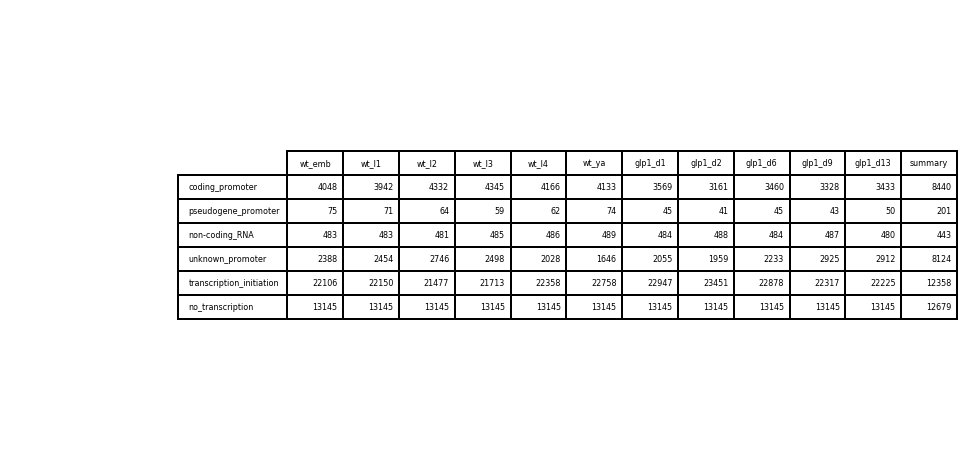

In [16]:
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_fwd_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_fwd.pdf', bbox_inches='tight')

In [17]:
# Reverse strand annotation summary
df_rev_ = pd.concat([df_prom_rev['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_rev_.columns = config['stages'] + ['summary']
#df_rev_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_rev_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_d1,glp1_d2,glp1_d6,glp1_d9,glp1_d13,summary
coding_promoter,4078,3887,4243,4306,4155,4043,3605,3054,3459,3365,3430,8317
pseudogene_promoter,80,70,76,74,76,73,44,40,52,43,46,215
non-coding_RNA,488,486,482,486,491,490,495,505,490,490,489,455
unknown_promoter,2384,2464,2856,2453,1991,1683,2035,1897,2184,2872,2969,8261
transcription_initiation,22000,22123,21373,21711,22317,22741,22851,23534,22845,22260,22096,12261
no_transcription,13215,13215,13215,13215,13215,13215,13215,13215,13215,13215,13215,12736


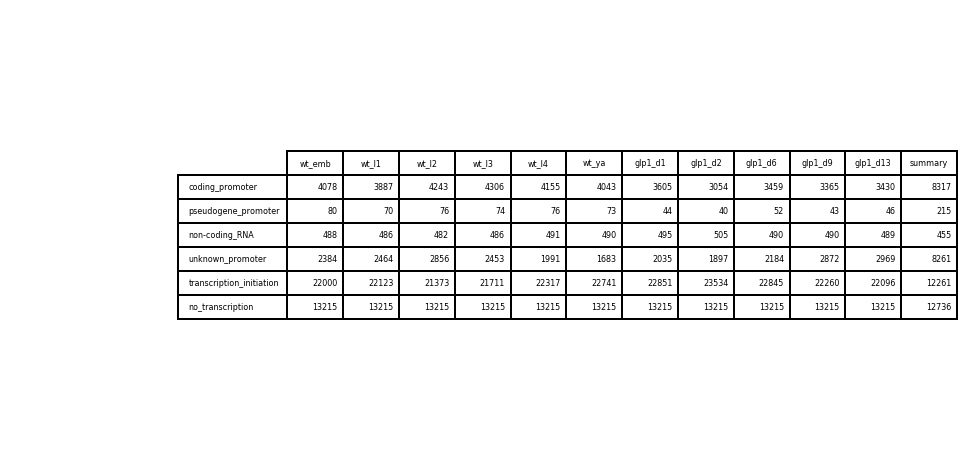

In [18]:
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_rev_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_rev.pdf', bbox_inches='tight')

In [19]:
# Cross-tabulate strand-specific summary annotation
pd.crosstab(pd.Categorical(df_prom_fwd['annot_summary']), pd.Categorical(df_prom_rev['annot_summary'])).loc[list(d_annot_strand_legend.keys()), list(d_annot_strand_legend.keys())]

col_0,coding_promoter,pseudogene_promoter,non-coding_RNA,unknown_promoter,transcription_initiation,no_transcription
row_0,,,,,,
coding_promoter,2281,46,25,2355,2138,1595
pseudogene_promoter,49,8,1,37,47,59
non-coding_RNA,27,0,48,35,80,253
unknown_promoter,2352,44,31,1152,3264,1281
transcription_initiation,2046,46,74,3388,3969,2835
no_transcription,1562,71,276,1294,2763,6713


In [20]:
m_prom = (df_prom_fwd['annot_summary'] == 'coding_promoter') | (df_prom_rev['annot_summary'] == 'coding_promoter')
m_both_scap = (df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2)
f_ = sum(m_prom & m_both_scap) / sum(m_prom)
print('%d bidirect, %d with scap, %d both, %.2f' % (sum(m_prom), sum(m_both_scap), sum(m_prom & m_both_scap), 100*f_))

14476 bidirect, 23059 with scap, 10937 both, 75.55


In [21]:
# S2_outron-extended_genes.bed <- genes extended by outron regions as defined by (aggregated) promoter annotations
def df_outron_extended_genes_(df_prom_fwd_, df_prom_rev_):

    # df_prom_bounds <- prom min/max boundaries, based on promoter annotation
    df_prom_bounds_fwd = df_prom_fwd_.groupby(['pass1_exon1_gene_id', 'pass1_exon1_locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']]
    df_prom_bounds_fwd.columns = ['chrom', 'start', 'end', 'gene_id', 'locus_id']

    df_prom_bounds_rev = df_prom_rev_.groupby(['pass1_exon1_gene_id', 'pass1_exon1_locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']]
    df_prom_bounds_rev.columns = ['chrom', 'start', 'end', 'gene_id', 'locus_id']

    df_prom_bounds = pd.concat([df_prom_bounds_fwd, df_prom_bounds_rev], axis=0, ignore_index=False)\
        .sort_values(['chrom', 'start', 'end']).reset_index(drop=True)
    print('%d fwd %d rev %d pooled' % (len(df_prom_bounds_fwd), len(df_prom_bounds_rev), len(df_prom_bounds)))

    # Write a .bed-file of all the regions that changed
    df_prom_bounds.to_csv(vp('_df_prom_bounds.bed'), index=False, header=False, sep='\t')
    !wc -l {vp('_df_prom_bounds.bed')}

    # df_gene_bounds <- gene min/max boundaries, based on annotation
    df_transcripts_ = yp.read_wbgtf('WS260_ce10/WS260_ce10.transcripts.annot.gtf.gz', parse_attr=False)
    df_transcripts = yp.df_gfftags_unpack(df_transcripts_, name='attribute')
    
    # Add display_id
    #fp_geneIDs = 'wget/ftp.wormbase.org/pub/wormbase/releases/WS260/species/c_elegans/PRJNA13758/annotation/c_elegans.PRJNA13758.WS260.geneIDs.txt.gz'
    #df_geneIDs = pd.read_csv(fp_geneIDs, sep=',', names=('na', 'gene_id', 'locus', 'sequence_id', 'status'))[['gene_id', 'locus', 'sequence_id', 'status']]
    #
    #def display_id_(locus, sequence_id, gene_id):
    #    if locus == locus:
    #        return locus
    #    elif sequence_id == sequence_id:
    #        return sequence_id
    #    else:
    #        return gene_id
    #
    #df_geneIDs['locus_id'] = list(map(display_id_, df_geneIDs['locus'], df_geneIDs['sequence_id'], df_geneIDs['gene_id']))
    #df_transcripts = pd.merge(df_transcripts, df_geneIDs[['gene_id', 'locus_id']], left_on='gene_id', right_on='gene_id')

    df_gene_bounds = df_transcripts.groupby(['gene_id', 'locus_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'gene_id', 'locus_id']].sort_values(['chrom', 'start', 'end']).reset_index(drop=True)

    df_gene_bounds.to_csv(vp('_df_gene_bounds.bed'), index=False, header=False, sep='\t')
    !wc -l {vp('_df_gene_bounds.bed')}
    
    df_ = df_prom_bounds.merge(df_gene_bounds, how='outer', on=['gene_id', 'locus_id'], suffixes=('_prom', '_gene'))
    df_['start'] = list(map(int, map(np.nanmin, zip(df_['start_prom'], df_['start_gene']))))
    df_['end'] = list(map(int, map(np.nanmax, zip(df_['end_prom'], df_['end_gene']))))
    df_ = df_[['chrom_gene', 'start', 'end', 'gene_id', 'locus_id']].sort_values(['chrom_gene', 'start', 'end']).reset_index(drop=True)
    df_.columns = [['chrom', 'start', 'end', 'gene_id', 'locus_id']]
    return df_

q_ = '(annot_summary == "coding_promoter") | (annot_summary == "pseudogene_promoter") | (annot_summary == "non-coding_RNA")'
df_outron_extended_genes = df_outron_extended_genes_(
    pd.concat([df_prom_fwd, df_exon_fwd['pass1_exon1_gene_id'], df_exon_fwd['pass1_exon1_locus_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']],
    pd.concat([df_prom_rev, df_exon_rev['pass1_exon1_gene_id'], df_exon_rev['pass1_exon1_locus_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'pass1_exon1_gene_id', 'pass1_exon1_locus_id']],
)
df_outron_extended_genes.to_csv(vp('outron-extended_genes.bed'), index=False, header=False, sep='\t')
!wc -l {vp('outron-extended_genes.bed')}

5986 fwd 5973 rev 11959 pooled
11959 annot/S2_regulatory_annotation/metrics/_df_prom_bounds.bed


/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


23155 annot/S2_regulatory_annotation/metrics/_df_gene_bounds.bed
23156 annot/S2_regulatory_annotation/metrics/outron-extended_genes.bed


In [22]:
# df_associated_gene <- associated gene assignments
df_associated_gene = pd.read_csv(BedTool.from_dataframe(df_atac[['chrom', 'start', 'end']]).map(
    BedTool.from_dataframe(df_outron_extended_genes).fn, c='4,5', o='distinct,distinct',).fn, sep='\t',
    names=yp.NAMES_BED9[:5])
df_associated_gene.columns = ['chrom', 'start', 'end', 'associated_gene_id', 'associated_locus_id']

***** WARNING: File /tmp/pybedtools.so6pguzl.tmp has inconsistent naming convention for record:
	3826	3977	.	.

***** WARNING: File /tmp/pybedtools.so6pguzl.tmp has inconsistent naming convention for record:
	3826	3977	.	.



In [23]:
# Table S2 -- unstranded summary annotation
def name_(annot_fwd, annot_rev, locus_id_fwd, locus_id_rev, enhancer_locus_id):
    if (annot_fwd in config['annot_with_gene_id']) and not(annot_rev in config['annot_with_gene_id']):
        return locus_id_fwd
    elif not(annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return locus_id_rev
    elif (annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return '%s / %s' % (locus_id_rev, locus_id_fwd)
    elif enhancer_locus_id != '.': # show "likeliest target gene for an enhancer" in brackets for all remaining (=not coding_promoter or non_coding_promoter)
        return '(%s)' % (enhancer_locus_id,)
    else:
        return ''

def annot_(annot_fwd, annot_rev):
    if annot_fwd == 'coding_promoter' or annot_rev == 'coding_promoter':
        return 'coding_promoter'
    elif annot_fwd == 'pseudogene_promoter' or annot_rev == 'pseudogene_promoter':
        return 'pseudogene_promoter'
    elif annot_fwd == 'non-coding_RNA' or annot_rev == 'non-coding_RNA':
        return 'non-coding_RNA'
    elif annot_fwd == 'unknown_promoter' or annot_rev == 'unknown_promoter':
        return 'unknown_promoter'
    elif annot_fwd == 'transcription_initiation' or annot_rev == 'transcription_initiation':
        return 'putative_enhancer'
    elif annot_fwd == 'no_transcription' or annot_rev == 'no_transcription':
        return 'other_element'
    assert False

def strand_(annot_fwd, annot_rev):
    promoter_fwd = (annot_fwd in config['annot_with_gene_id'])
    promoter_rev = (annot_rev in config['annot_with_gene_id'])
    lcap_fwd = annot_fwd == 'unknown_promoter'
    lcap_rev = annot_rev == 'unknown_promoter'
    if promoter_fwd and promoter_rev:
        return '.'
    elif promoter_fwd and (not promoter_rev):
        return '+'
    elif (not promoter_fwd) and promoter_rev:
        return '-'
    # in the absence of promoter annotations with an "annotated" target, use unknown_promoter annotations for strand
    elif lcap_fwd and lcap_rev:
        return '.'
    elif lcap_fwd and (not lcap_rev):
        return '+'
    elif (not lcap_fwd) and lcap_rev:
        return '-'
    else:
        return '.'

df_regl = df_atac[['chrom', 'start', 'end']].copy()
df_regl['tss_fwd'] = df_prom_fwd['scap_mode']
df_regl['tss_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_fwd'] = df_prom_fwd['scap_mode']
df_regl['scap_mode_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_count_fwd'] = df_prom_fwd['scap_mode_count']
df_regl['scap_mode_count_rev'] = df_prom_rev['scap_mode_count']
df_regl['scap_count_fwd'] = df_prom_fwd['scap_count']
df_regl['scap_count_rev'] = df_prom_rev['scap_count']
df_regl['annot_fwd'] = df_prom_fwd['annot_summary']
df_regl['annot_rev'] = df_prom_rev['annot_summary']
df_regl['annot'] = list(map(annot_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))
df_regl['strand'] = list(map(strand_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))

def agg_pass1_pass2(annot, pass1_val, pass2_val):
    if annot in ['coding_promoter', 'pseudogene_promoter']:
        return pass1_val
    elif annot == 'non-coding_RNA':
        return pass2_val
    else:
        return ''

df_regl['promoter_gene_id_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_gene_id'], df_exon_fwd['pass2_exon1_gene_id']))
df_regl['promoter_gene_id_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_gene_id'], df_exon_rev['pass2_exon1_gene_id']))

df_regl['promoter_locus_id_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_locus_id'], df_exon_fwd['pass2_exon1_locus_id']))
df_regl['promoter_locus_id_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_locus_id'], df_exon_rev['pass2_exon1_locus_id']))

df_regl['promoter_gene_biotype_fwd'] = list(map(agg_pass1_pass2, df_regl['annot_fwd'],
                                    df_exon_fwd['pass1_exon1_gene_biotype'], df_exon_fwd['pass2_exon1_gene_biotype']))
df_regl['promoter_gene_biotype_rev'] = list(map(agg_pass1_pass2, df_regl['annot_rev'],
                                    df_exon_rev['pass1_exon1_gene_biotype'], df_exon_rev['pass2_exon1_gene_biotype']))

df_regl['associated_gene_id'] = df_associated_gene['associated_gene_id']
df_regl['associated_locus_id'] = df_associated_gene['associated_locus_id']

df_regl['label'] = list(map(name_,
    df_regl['annot_fwd'], df_regl['annot_rev'],                     
    df_regl['promoter_locus_id_fwd'], df_regl['promoter_locus_id_rev'],
    df_regl['associated_locus_id']
))

for stage in config['stages_wt'] + config['stages_glp1']:
    df_regl['atac_%s_height' % (stage,)] = df_atac['atac_%s_height' % (stage,)]

fp_ = 'annot/S2_regulatory_annotation/S2_regulatory_annotation.tsv'
l_ = [
    'chrom', 'start', 'end', 
    'annot', 'annot_fwd', 'annot_rev',
    'promoter_gene_id_fwd', 'promoter_locus_id_fwd', 'promoter_gene_biotype_fwd',
    'promoter_gene_id_rev', 'promoter_locus_id_rev', 'promoter_gene_biotype_rev',
    'associated_gene_id', 'associated_locus_id',
] + ['atac_%s_height' % (stage,) for stage in config['stages_wt'] + config['stages_glp1']] + [\
    'tss_fwd', 'tss_rev',
    #'scap_mode_count_fwd', 'scap_mode_count_rev',
    #'scap_count_fwd', 'scap_count_rev',
]

pd.concat([df_regl[l_], df_lcap], axis=1).to_csv(fp_, header=True, index=False, sep='\t')

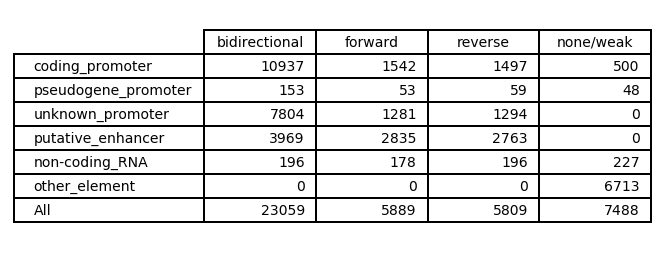

In [24]:
def scap_bidirectionality(mode_count_fwd, mode_count_rev):
    if mode_count_fwd >= 2 and mode_count_rev >= 2:
        return 'bidirectional'
    elif mode_count_fwd >= 2:
        return 'forward'
    elif mode_count_rev >= 2:
        return 'reverse'
    else:
        return 'none/weak'

df_has_scap = pd.DataFrame()
df_has_scap['annot'] = df_regl['annot']
df_has_scap['scap_bidirectionality'] = list(map(scap_bidirectionality, 
    df_prom_fwd['scap_mode_count'], df_prom_rev['scap_mode_count']))
df_has_scap['scap_bidirectionality'].value_counts()

df_ = pd.crosstab(pd.Categorical(df_has_scap['annot']), pd.Categorical(df_has_scap['scap_bidirectionality']),
                 margins=True)\
.loc[config['annot'] + ['All'], ['bidirectional', 'forward', 'reverse', 'none/weak']]

fig = plt.figure(figsize=(4,2))
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_, ax=plt.gca(), loc='center left')
plt.savefig('annot/FigA_mapping/annot_crosstab_scap.pdf', bbox_inches='tight')

In [25]:
# Strand/stage-specific annotations as .bed-tracks
write_gffbed(vp('regulatory_annotation_fwd.bed'),
        chrom = df_regl['chrom'],
        start = df_regl['start'],
        end = df_regl['end'],
        name = df_regl['promoter_locus_id_fwd'],
        strand = '+',
        itemRgb = list(map(lambda annot: d_annot_strand_legend[annot], df_regl['annot_fwd'])),
        attr = df_prom_fwd[['annot_%s' % (stage,) for stage in config['stages']]],
)

write_gffbed(vp('regulatory_annotation_rev.bed'),
        chrom = df_regl['chrom'],
        start = df_regl['start'],
        end = df_regl['end'],
        name = df_regl['promoter_locus_id_rev'],
        strand = '-',
        itemRgb = list(map(lambda annot: d_annot_strand_legend[annot], df_regl['annot_rev'])),
        attr = df_prom_rev[['annot_%s' % (stage,) for stage in config['stages']]],
)

In [26]:
# Visualise annotation as a single, unstranded .bed-file
def write_regl_bed9(fp_, df_regl_):
    write_gffbed(fp_,
        chrom = df_regl_['chrom'],
        start = df_regl_['start'],
        end = df_regl_['end'],
        name = df_regl_['label'],
        strand = df_regl_['strand'],
        itemRgb = list(map(lambda annot: d_annot_legend[annot], df_regl_['annot'])),
        attr = df_regl_[['annot', 'annot_fwd', 'annot_rev']],
    )

write_regl_bed9('annot/S2_regulatory_annotation/S2_regulatory_annotation.bed', df_regl)

In [27]:
# .bed-files of specific types of elements
for annot in config['annot']:
    fp_ = vp('S2_regulatory_annotation.%s_only.bed' % (annot,))
    write_regl_bed9(fp_, df_regl.query('annot == "%s"' % (annot,)).reset_index(drop=True))
    !wc -l {fp_}

14477 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.coding_promoter_only.bed
314 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.pseudogene_promoter_only.bed
10380 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.unknown_promoter_only.bed
9568 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.putative_enhancer_only.bed
798 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.non-coding_RNA_only.bed
6714 annot/S2_regulatory_annotation/metrics/S2_regulatory_annotation.other_element_only.bed


2428 bidirectional promoters
6088 forward-only promoters
5960 reverse-only promoters


Text(0.950792,-0.553167,'2428 bidirectional\npromoters')

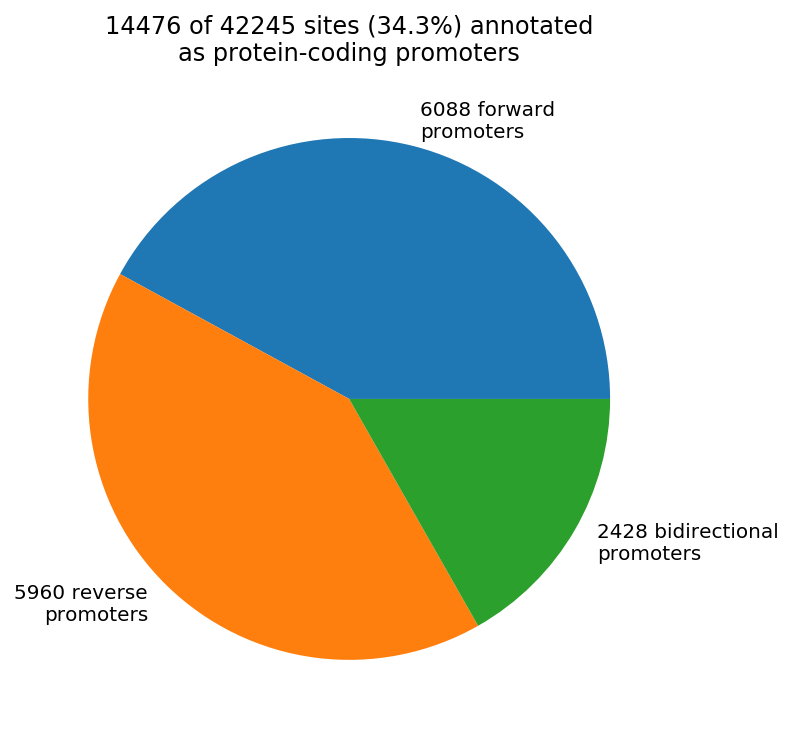

In [28]:
# Visualise number of promoters called
n_bid = len(df_regl.query('(annot == "coding_promoter") & (strand == ".")'))
n_fwd = len(df_regl.query('(annot == "coding_promoter") & (strand == "+")'))
n_rev = len(df_regl.query('(annot == "coding_promoter") & (strand == "-")'))
print('%d bidirectional promoters' % (n_bid))
print('%d forward-only promoters' % (n_fwd,))
print('%d reverse-only promoters' % (n_rev,))
plt.figure(figsize=(16,6)).subplots_adjust(wspace=0.4)
plt.subplot(1,2,1, aspect=1)
plt.title('%d of %d sites (%.1f%%) annotated\nas protein-coding promoters' % \
    (n_fwd + n_rev + n_bid, len(df_regl), 100 * (n_fwd + n_rev + n_bid) / float(len(df_regl)),))
plt.pie([n_fwd, n_rev, n_bid], labels=[
        '%(n_fwd)d forward\npromoters' % locals(),
        '%(n_rev)d reverse\npromoters' % locals(), 
        '%(n_bid)d bidirectional\npromoters' % locals(),
])[-1][-1]